In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [7]:
x_train.shape

(60000, 784)

In [8]:
x_test.shape

(10000, 784)

In [9]:
input_dim = x_train.shape[1]
encoding_dim = 64

In [49]:
input_img = Input(shape=(input_dim,))
x = Dense(128, activation='relu')(input_img)

In [51]:
print(x)

KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='dense_21/Relu:0', description="created by layer 'dense_21'")


In [10]:
input_img = Input(shape=(input_dim,))
x = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(x)
y = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='linear')(y)
autoencoder = Model(input_img, decoded)

In [11]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218192 (852.31 KB)
Trainable params: 218192 (852.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse',  metrics=['mse'])

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 5s 13ms/step - loss: 2547.4390 - mse: 2547.4390 - val_loss: 1432.9398 - val_mse: 1432.9398
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 1277.9447 - mse: 1277.9447 - val_loss: 1161.2230 - val_mse: 1161.2230
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 1094.5339 - mse: 1094.5339 - val_loss: 1045.1324 - val_mse: 1045.1324
Epoch 4/10
235/235 [==============================] - 2s 9ms/step - loss: 1003.8599 - mse: 1003.8599 - val_loss: 973.4268 - val_mse: 973.4268
Epoch 5/10
235/235 [==============================] - 2s 8ms/step - loss: 946.9205 - mse: 946.9205 - val_loss: 928.1810 - val_mse: 928.1810
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 907.5084 - mse: 907.5084 - val_loss: 894.2512 - val_mse: 894.2512
Epoch 7/10
235/235 [==============================] - 3s 14ms/step - loss: 879.2245 - mse: 879.2245 - val_loss: 869.6846 - val_mse: 869.6846
Ep

313/313 [==============================] - 1s 3ms/step


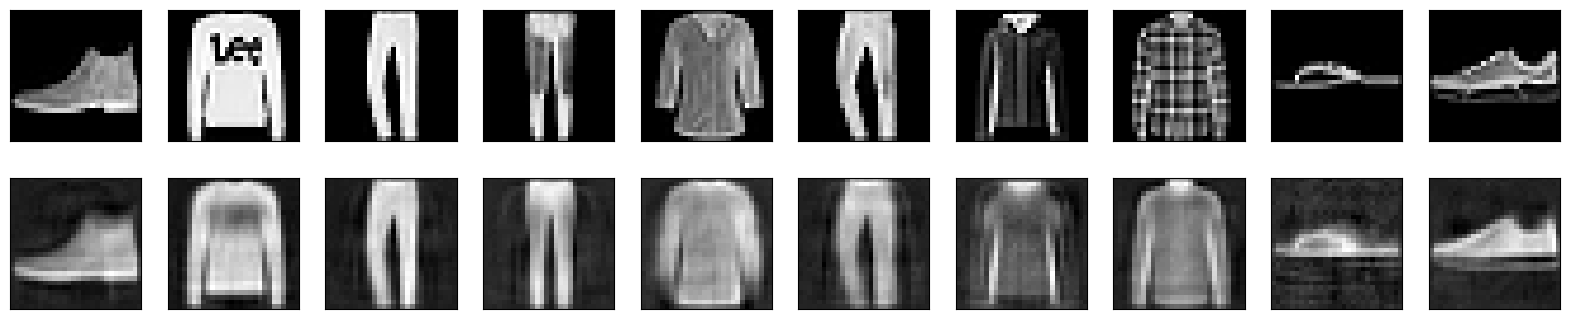

In [13]:
# Encode and decode some images
encoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [46]:
import matplotlib.pyplot as plt

# Define a function to create plots
def plot_curves(history, title):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['mse'])
    plt.plot(history.history['val_mse'])
    plt.title(f'{title} Model MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

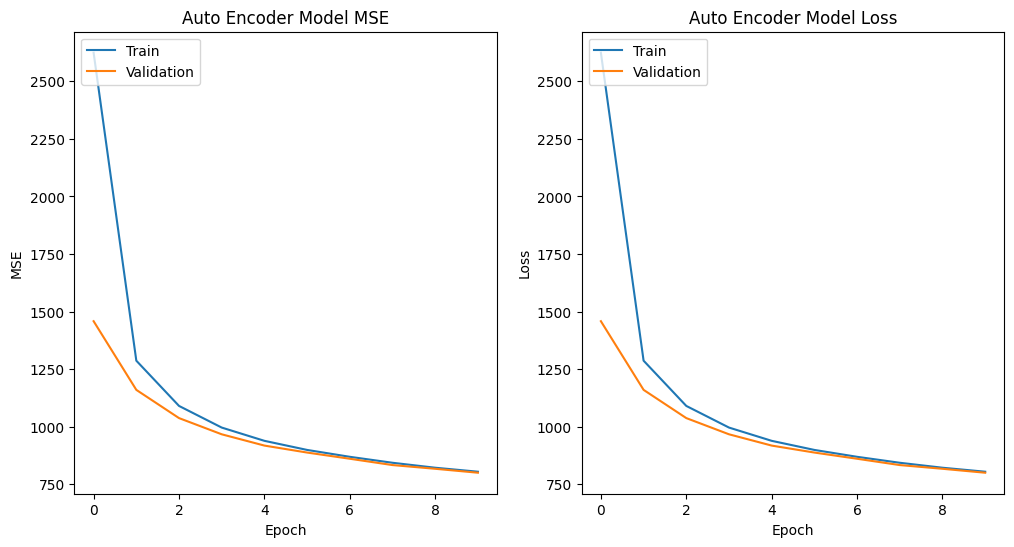

In [47]:
plot_curves(history, "Auto Encoder")

In [14]:
input_img = Input(shape=(input_dim,))
x = Dense(128, activation='sigmoid')(input_img)
encoded = Dense(64, activation='sigmoid')(x)
y = Dense(128, activation='sigmoid')(encoded)
decoded = Dense(784, activation='sigmoid')(y)
autoencoder = Model(input_img, decoded)

In [17]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 4s 12ms/step - loss: -1097.6383 - accuracy: 0.0015 - val_loss: -1100.7122 - val_accuracy: 0.0020
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: -1097.6226 - accuracy: 0.0015 - val_loss: -1100.7012 - val_accuracy: 0.0014
Epoch 3/10
235/235 [==============================] - 3s 14ms/step - loss: -1097.5649 - accuracy: 0.0015 - val_loss: -1100.6658 - val_accuracy: 0.0014
Epoch 4/10
235/235 [==============================] - 3s 14ms/step - loss: -1097.4688 - accuracy: 0.0015 - val_loss: -1100.5162 - val_accuracy: 0.0020
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: -1097.3583 - accuracy: 0.0013 - val_loss: -1100.4491 - val_accuracy: 6.0000e-04
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: -1097.3127 - accuracy: 0.0011 - val_loss: -1100.4313 - val_accuracy: 6.0000e-04
Epoch 7/10
235/235 [==============================] - 4s 19ms/step - loss: -1097.2931 

313/313 [==============================] - 1s 4ms/step


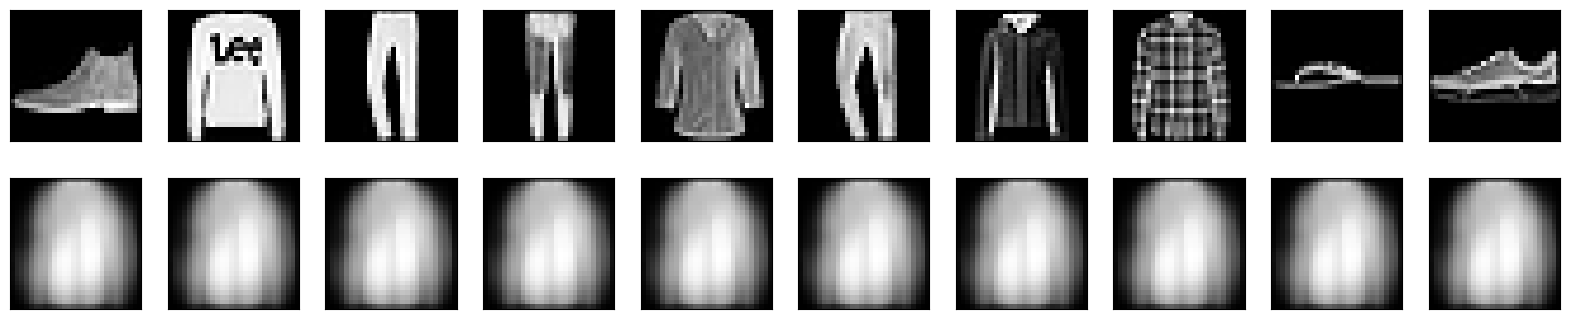

In [16]:
# Encode and decode some images
encoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [13]:
from tensorflow.keras.datasets import mnist

Training data shapes: X=(60000, 28, 28), y=(60000,)
Testing data shapes: X=(10000, 28, 28), y=(10000,)


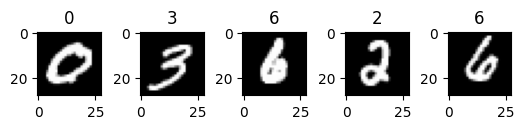

In [14]:
(trainX, trainy), (testX, testy) = mnist.load_data()
print('Training data shapes: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Testing data shapes: X=%s, y=%s' % (testX.shape, testy.shape))
for j in range(5):
    i = np.random.randint(0, 10000)
    plt.subplot(550 + 1 + j)
    plt.imshow(trainX[i], cmap='gray')
    plt.title(trainy[i])
plt.show()

In [15]:
trainX

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [16]:
# normalizing pixel intensities
trainX = trainX/255
testX = testX/255
#reshaping data into single dimension
train_data = np.reshape(trainX, (60000, 28*28))
test_data = np.reshape(testX, (10000, 28*28))
print (train_data.shape, test_data.shape)

(60000, 784) (10000, 784)


In [17]:
import tensorflow

In [18]:
input_data = tensorflow.keras.layers.Input(shape=(784))
encoder = tensorflow.keras.layers.Dense(100)(input_data)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)
encoder = tensorflow.keras.layers.Dense(50)(encoder)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)
encoder = tensorflow.keras.layers.Dense(25)(encoder)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)
encoded = tensorflow.keras.layers.Dense(2)(encoder)

In [19]:
decoder = tensorflow.keras.layers.Dense(25)(encoded)
decoder = tensorflow.keras.layers.Activation('relu')(decoder)
decoder = tensorflow.keras.layers.Dense(50)(decoder)
decoder = tensorflow.keras.layers.Activation('relu')(decoder)
decoder = tensorflow.keras.layers.Dense(100)(decoder)
decoder = tensorflow.keras.layers.Activation('relu')(decoder)
decoded = tensorflow.keras.layers.Dense(784)(decoder)

In [20]:
autoencoder = tensorflow.keras.models.Model(inputs=input_data, outputs=decoded)
autoencoder.compile(loss='mse', optimizer='adam')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 activation_6 (Activation)   (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 activation_7 (Activation)   (None, 50)                0         
                                                                 
 dense_10 (Dense)            (None, 25)                1275      
                                                                 
 activation_8 (Activation)   (None, 25)                0   

In [23]:
history = autoencoder.fit(train_data, train_data, epochs=30, batch_size=256, validation_data=(test_data, test_data))

Epoch 1/30
235/235 [==============================] - 2s 10ms/step - loss: 2752.0525 - val_loss: 2741.6421
Epoch 2/30
235/235 [==============================] - 2s 9ms/step - loss: 2736.2383 - val_loss: 2734.5757
Epoch 3/30
235/235 [==============================] - 2s 10ms/step - loss: 2723.0347 - val_loss: 2716.9431
Epoch 4/30
235/235 [==============================] - 3s 11ms/step - loss: 2715.0613 - val_loss: 2702.9727
Epoch 5/30
235/235 [==============================] - 3s 12ms/step - loss: 2699.1243 - val_loss: 2689.5569
Epoch 6/30
235/235 [==============================] - 3s 11ms/step - loss: 2690.7612 - val_loss: 2676.2314
Epoch 7/30
235/235 [==============================] - 3s 12ms/step - loss: 2686.1277 - val_loss: 2665.8982
Epoch 8/30
235/235 [==============================] - 2s 10ms/step - loss: 2682.8735 - val_loss: 2665.9131
Epoch 9/30
235/235 [==============================] - 2s 10ms/step - loss: 2665.1208 - val_loss: 2662.5129
Epoch 10/30
235/235 [=================

In [26]:
input_data = tensorflow.keras.layers.Input(shape=(784))
encoder = tensorflow.keras.layers.Dense(100)(input_data)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)
encoder = tensorflow.keras.layers.Dense(50)(encoder)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)

In [28]:
decoder = tensorflow.keras.layers.Dense(100)(encoder)
decoder = tensorflow.keras.layers.Activation('relu')(decoder)
decoder = tensorflow.keras.layers.Dense(784)(decoder)
decoded = tensorflow.keras.layers.Activation('linear')(decoder)

In [29]:
autoencoder = tensorflow.keras.models.Model(inputs=input_data, outputs=decoded)
autoencoder.compile(loss='mse', optimizer='adam')
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 activation_12 (Activation)  (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 activation_13 (Activation)  (None, 50)                0         
                                                                 
 dense_19 (Dense)            (None, 100)               5100      
                                                                 
 activation_14 (Activation)  (None, 100)               0   

In [30]:
history = autoencoder.fit(train_data, train_data, epochs=30, batch_size=256, validation_data=(test_data, test_data))

Epoch 1/30
235/235 [==============================] - 4s 13ms/step - loss: 2689.9250 - val_loss: 1530.1497
Epoch 2/30
235/235 [==============================] - 3s 12ms/step - loss: 1378.5078 - val_loss: 1235.8368
Epoch 3/30
235/235 [==============================] - 3s 13ms/step - loss: 1210.0266 - val_loss: 1151.1960
Epoch 4/30
235/235 [==============================] - 3s 12ms/step - loss: 1152.5796 - val_loss: 1106.0175
Epoch 5/30
235/235 [==============================] - 3s 11ms/step - loss: 1110.7605 - val_loss: 1075.7518
Epoch 6/30
235/235 [==============================] - 3s 12ms/step - loss: 1093.7836 - val_loss: 1063.8469
Epoch 7/30
235/235 [==============================] - 3s 11ms/step - loss: 1086.4551 - val_loss: 1059.8961
Epoch 8/30
235/235 [==============================] - 3s 11ms/step - loss: 1080.6033 - val_loss: 1053.5334
Epoch 9/30
235/235 [==============================] - 3s 13ms/step - loss: 1077.0209 - val_loss: 1050.7820
Epoch 10/30
235/235 [================

313/313 [==============================] - 1s 3ms/step


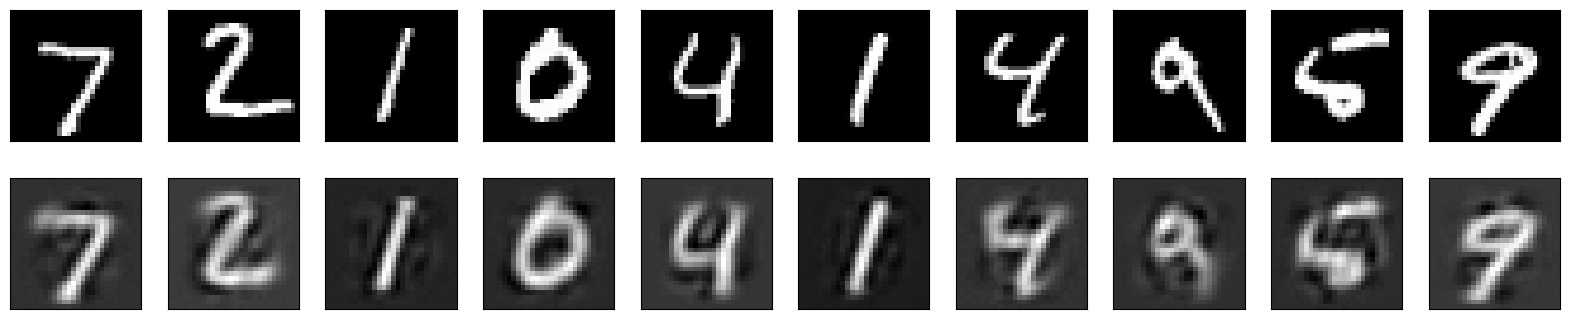

In [31]:
# Encode and decode some images
encoded_imgs = autoencoder.predict(test_data)

# Plot original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Reduced Dimensions
We saw that this small network was capable of re-constructing the original image using just two numbers(h: layer) from the encoding layer(bottleneck layer). Now these reduced dimensions can be used in other applications as features for these images. To verify the fact, let’s plot these embeddings(features) for all the test dataset digits.

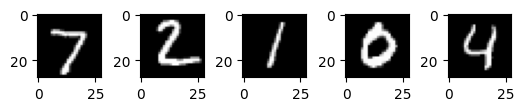

In [32]:
# Real Images
for i in range(5):
    plt.subplot(550 + 1 + i)
    plt.imshow(testX[i], cmap='gray')
plt.show()

1/1 [==============================] - 0s 34ms/step


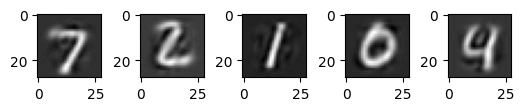

In [33]:
# Reconstructed Images
for i in range(5):
    plt.subplot(550 + 1 + i)
    output = autoencoder.predict(np.array([test_data[i]]))
    op_image = np.reshape(output[0]*255, (28, 28))
    plt.imshow(op_image, cmap='gray')
plt.show()

In [34]:
dr_model = tensorflow.keras.models.Model(inputs=autoencoder.get_layer('input_3').input, outputs=autoencoder.get_layer('dense_16').output)
dr_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
Total params: 78500 (306.64 KB)
Trainable params: 78500 (306.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
x = []
y = []
z = []
for i in range(10000):
    z.append(testy[i])
    op = dr_model.predict(np.array([test_data[i]]))
    x.append(op[0][0])
    y.append(op[0][1])

1/1 [==============================] - 0s 28ms/step


Each image from the test dataset is represented with 2-dimensions and is plotted as a point in the scatterplot below where color represents the label of the image. We can notice that the same digits are closer in the latent space. Even this simple autoencoder is able to separate out digits in different cluster-

In [ ]:
df = pd.DataFrame()
df['x'] = x
df['y'] = y
df['z'] = ["digit-"+str(k) for k in z]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', hue='z', data=df)
plt.show()

In [9]:
from tensorflow.keras.layers import Dropout

In [10]:
input_img = Input(shape=(input_dim,))
x = Dense(128, activation='relu')(input_img)
x1 = Dense(64, activation='relu')(x)
encoded = Dense(32, activation='relu')(x1)

y = Dense(64, activation='relu')(encoded)
y1 = Dense(128, activation='relu')(y)
decoded = Dense(784, activation='linear')(y1)

autoencoder = Model(input_img, decoded)

In [11]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136

In [12]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse',  metrics=['mse'])

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 4s 10ms/step - loss: 2706.9009 - mse: 2706.9009 - val_loss: 1554.9766 - val_mse: 1554.9766
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 1428.2942 - mse: 1428.2942 - val_loss: 1326.8103 - val_mse: 1326.8103
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 1267.7700 - mse: 1267.7700 - val_loss: 1222.1151 - val_mse: 1222.1151
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 1180.6682 - mse: 1180.6682 - val_loss: 1151.4167 - val_mse: 1151.4167
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 1121.8754 - mse: 1121.8754 - val_loss: 1103.2261 - val_mse: 1103.2261
Epoch 6/10
235/235 [==============================] - 3s 14ms/step - loss: 1078.3613 - mse: 1078.3613 - val_loss: 1063.6924 - val_mse: 1063.6924
Epoch 7/10
235/235 [==============================] - 4s 15ms/step - loss: 1046.6710 - mse: 1046.6710 - val_loss: 1039.9664 - val_

313/313 [==============================] - 1s 3ms/step


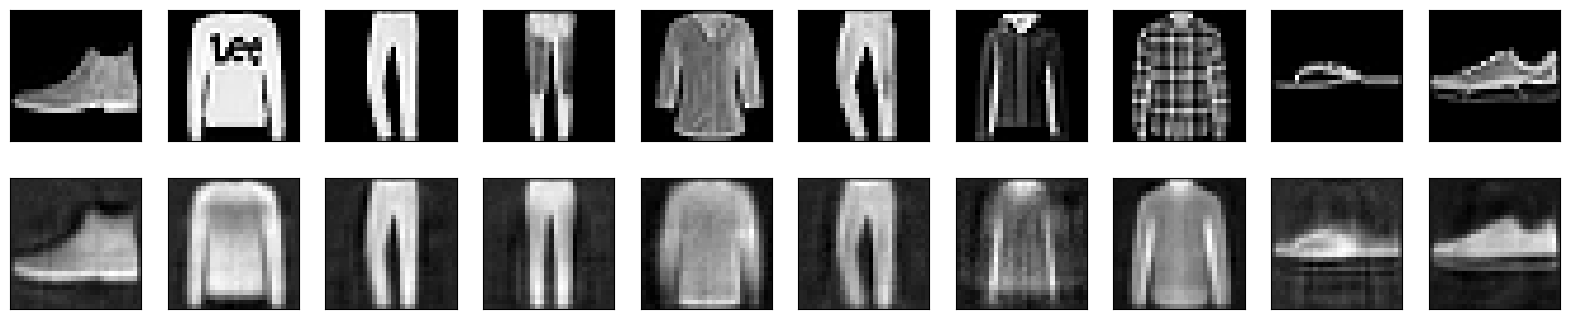

In [13]:
# Encode and decode some images
encoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
import matplotlib.pyplot as plt

# Define a function to create plots
def plot_curves(history, title):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['mse'])
    plt.plot(history.history['val_mse'])
    plt.title(f'{title} Model MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

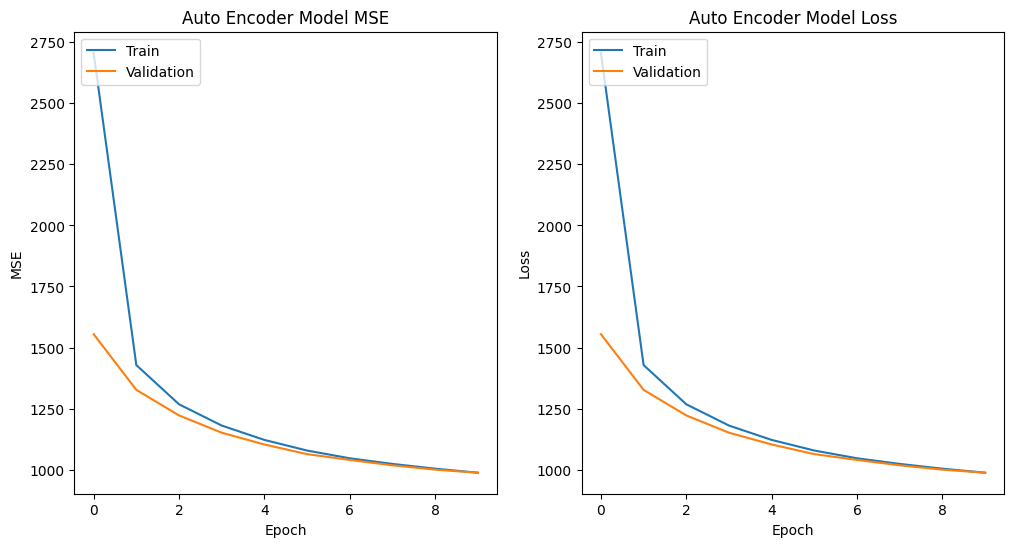

In [15]:
plot_curves(history, "Auto Encoder")

In [16]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture with L1 and L2 regularization
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,),kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    Dense(32, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    Dense(3, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                320       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2499 (9.76 KB)
Trainable params: 2499 (9.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/10
15/15 [==============================] - 1s 22ms/step - loss: 4.4244 - accuracy: 0.2083 - val_loss: 4.1221 - val_accuracy: 0.5000
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 3.9386 - accuracy: 0.5583 - val_loss: 3.7056 - val_accuracy: 0.7000
Epoch 3/10
15/15 [==============================] - 0s 8ms/step - loss: 3.5675 - accuracy: 0.6667 - val_loss: 3.3732 - val_accuracy: 0.8667
Epoch 4/10
15/15 [==============================] - 0s 7ms/step - loss: 3.2349 - accuracy: 0.9667 - val_loss: 3.0708 - val_accuracy: 0.9667
Epoch 5/10
15/15 [==============================] - 0s 8ms/step - loss: 2.9545 - accuracy: 0.9083 - val_loss: 2.7860 - val_accuracy: 0.7333
Epoch 6/10
15/15 [==============================] - 0s 7ms/step - loss: 2.6929 - accuracy: 0.7000 - val_loss: 2.5404 - val_accuracy: 0.9333
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 2.4497 - accuracy: 0.9500 - val_loss: 2.3210 - val_accuracy: 0.9000
Epoch 8/10
15/15 [=

In [19]:
import matplotlib.pyplot as plt

# Define a function to create plots
def plot_curves(history, title):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

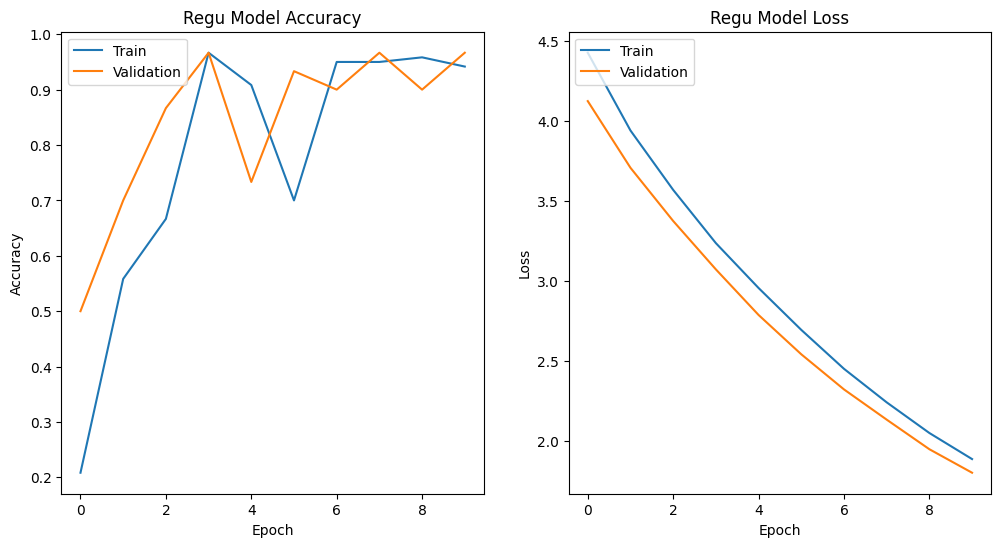

In [20]:
plot_curves(history, "Regu")

In [21]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/10
15/15 [==============================] - 1s 17ms/step - loss: 0.9813 - accuracy: 0.5333 - val_loss: 0.7789 - val_accuracy: 0.7000
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 0.7496 - accuracy: 0.7083 - val_loss: 0.6673 - val_accuracy: 0.8333
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 0.6490 - accuracy: 0.8833 - val_loss: 0.5834 - val_accuracy: 0.8333
Epoch 4/10
15/15 [==============================] - 0s 8ms/step - loss: 0.5601 - accuracy: 0.8667 - val_loss: 0.4996 - val_accuracy: 0.9000
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 0.4902 - accuracy: 0.9417 - val_loss: 0.4500 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 0s 7ms/step - loss: 0.4407 - accuracy: 0.9083 - val_loss: 0.4067 - val_accuracy: 0.9333
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 0.4037 - accuracy: 0.9333 - val_loss: 0.3825 - val_accuracy: 1.0000
Epoch 8/10
15/15 [=

In [23]:
import matplotlib.pyplot as plt

# Define a function to create plots
def plot_curves(history, title):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

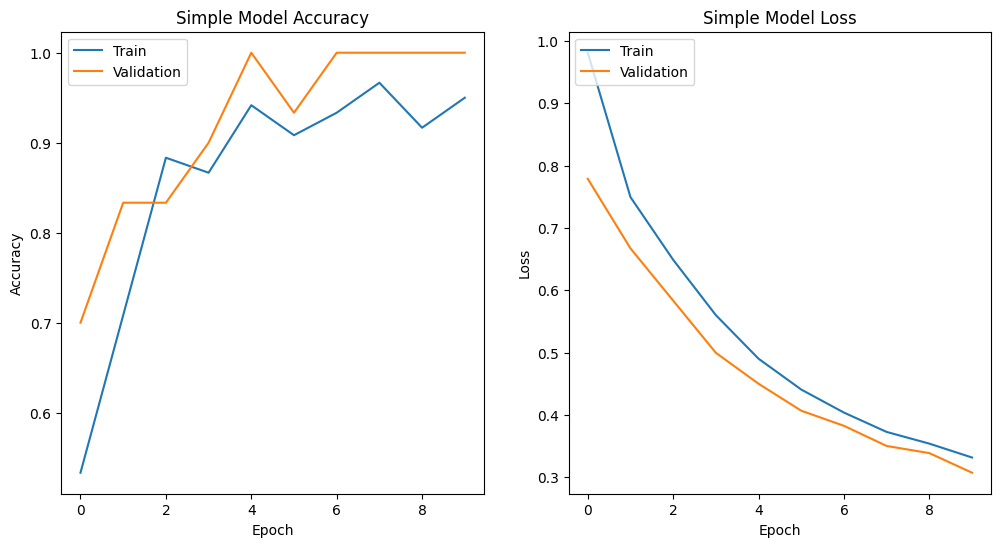

In [24]:
plot_curves(history, "Simple")

In [25]:
# Define the model architecture with L1 and L2 regularization
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,),kernel_regularizer=regularizers.l1(l1=0.01)),
    Dense(32, activation='relu',kernel_regularizer=regularizers.l1(l1=0.01)),
    Dense(3, activation='softmax')
])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                320       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2499 (9.76 KB)
Trainable params: 2499 (9.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/10
15/15 [==============================] - 1s 20ms/step - loss: 3.9588 - accuracy: 0.3500 - val_loss: 3.6964 - val_accuracy: 0.4333
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 3.5277 - accuracy: 0.5917 - val_loss: 3.3263 - val_accuracy: 0.7333
Epoch 3/10
15/15 [==============================] - 0s 7ms/step - loss: 3.1979 - accuracy: 0.7750 - val_loss: 3.0341 - val_accuracy: 0.8333
Epoch 4/10
15/15 [==============================] - 0s 5ms/step - loss: 2.9237 - accuracy: 0.7000 - val_loss: 2.7586 - val_accuracy: 0.8667
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 2.6590 - accuracy: 0.9667 - val_loss: 2.5317 - val_accuracy: 0.9333
Epoch 6/10
15/15 [==============================] - 0s 9ms/step - loss: 2.4517 - accuracy: 0.8250 - val_loss: 2.3258 - val_accuracy: 0.8000
Epoch 7/10
15/15 [==============================] - 0s 9ms/step - loss: 2.2456 - accuracy: 0.9417 - val_loss: 2.1483 - val_accuracy: 0.9667
Epoch 8/10
15/15 [=

In [28]:
import matplotlib.pyplot as plt

# Define a function to create plots
def plot_curves(history, title):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

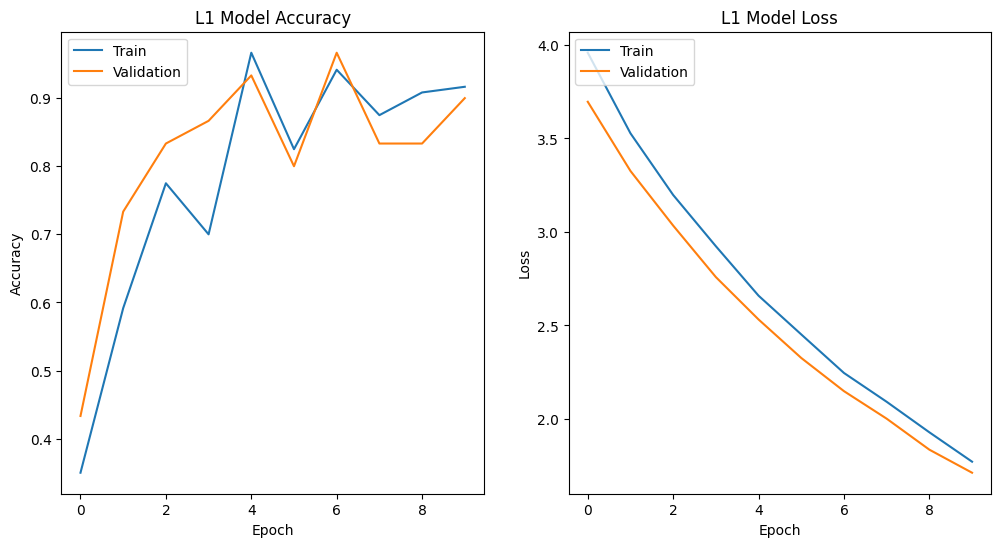

In [29]:
plot_curves(history, "L1")

In [30]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [31]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(4,),kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                80        
                                                                 
 batch_normalization (Batch  (None, 16)                64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 32)               

In [33]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/10
15/15 [==============================] - 5s 53ms/step - loss: 9.7470 - accuracy: 0.4333 - val_loss: 9.4906 - val_accuracy: 0.3000
Epoch 2/10
15/15 [==============================] - 0s 15ms/step - loss: 9.4474 - accuracy: 0.5000 - val_loss: 9.3074 - val_accuracy: 0.3000
Epoch 3/10
15/15 [==============================] - 0s 18ms/step - loss: 8.9931 - accuracy: 0.6000 - val_loss: 9.0741 - val_accuracy: 0.6000
Epoch 4/10
15/15 [==============================] - 0s 15ms/step - loss: 8.7601 - accuracy: 0.6500 - val_loss: 8.8576 - val_accuracy: 0.6333
Epoch 5/10
15/15 [==============================] - 0s 15ms/step - loss: 8.6961 - accuracy: 0.6250 - val_loss: 8.6708 - val_accuracy: 0.6333
Epoch 6/10
15/15 [==============================] - 0s 16ms/step - loss: 8.3623 - accuracy: 0.7000 - val_loss: 8.4585 - val_accuracy: 0.7667
Epoch 7/10
15/15 [==============================] - 0s 11ms/step - loss: 8.1937 - accuracy: 0.7417 - val_loss: 8.1876 - val_accuracy: 0.8667
Epoch 8/10
15

In [34]:
import matplotlib.pyplot as plt

# Define a function to create plots
def plot_curves(history, title):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

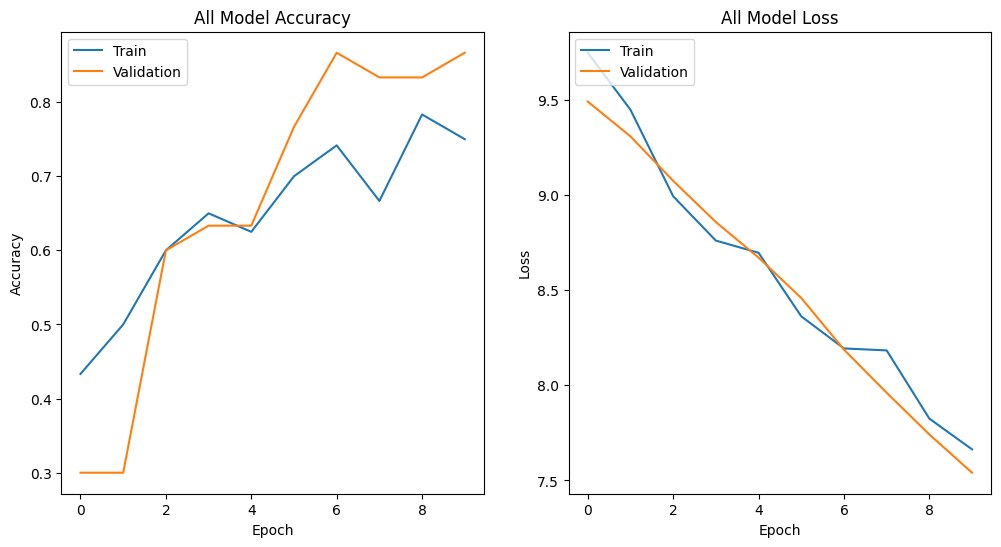

In [35]:
plot_curves(history, "All")

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

In [11]:
from tensorflow.keras.layers import Dropout, BatchNormalization

In [12]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(4,),kernel_regularizer=regularizers.l1(l1=0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu',kernel_regularizer=regularizers.l1(l1=0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu',kernel_regularizer=regularizers.l1(l1=0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu',kernel_regularizer=regularizers.l1(l1=0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu',kernel_regularizer=regularizers.l1(l1=0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 batch_normalization (Batch  (None, 16)                64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/10
15/15 [==============================] - 4s 42ms/step - loss: 8.5200 - accuracy: 0.3833 - val_loss: 8.1160 - val_accuracy: 0.3667
Epoch 2/10
15/15 [==============================] - 0s 7ms/step - loss: 8.1634 - accuracy: 0.5167 - val_loss: 7.9854 - val_accuracy: 0.3667
Epoch 3/10
15/15 [==============================] - 0s 8ms/step - loss: 8.0987 - accuracy: 0.5583 - val_loss: 7.8848 - val_accuracy: 0.4000
Epoch 4/10
15/15 [==============================] - 0s 12ms/step - loss: 7.8276 - accuracy: 0.5500 - val_loss: 7.7733 - val_accuracy: 0.3667
Epoch 5/10
15/15 [==============================] - 0s 10ms/step - loss: 7.7587 - accuracy: 0.6000 - val_loss: 7.6644 - val_accuracy: 0.3667
Epoch 6/10
15/15 [==============================] - 0s 8ms/step - loss: 7.5882 - accuracy: 0.5917 - val_loss: 7.5325 - val_accuracy: 0.3667
Epoch 7/10
15/15 [==============================] - 0s 7ms/step - loss: 7.3669 - accuracy: 0.6583 - val_loss: 7.3961 - val_accuracy: 0.4000
Epoch 8/10
15/15 

In [16]:
import matplotlib.pyplot as plt

# Define a function to create plots
def plot_curves(history, title):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

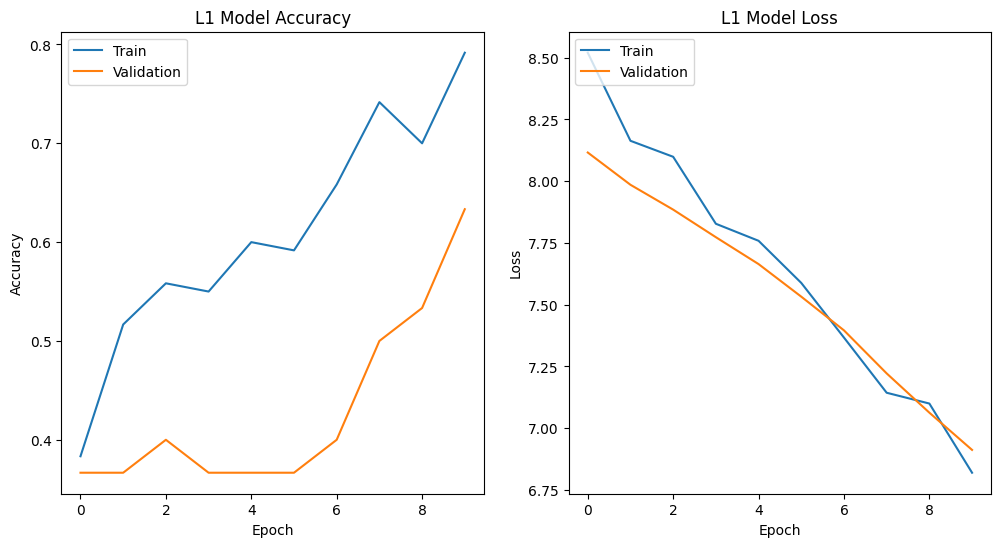

In [17]:
plot_curves(history, "L1")

In [18]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(4,),kernel_regularizer=regularizers.l1(l1=0.01)),
    Dense(32, activation='relu',kernel_regularizer=regularizers.l1(l1=0.01)),
    Dense(64, activation='relu',kernel_regularizer=regularizers.l1(l1=0.01)),
    Dense(32, activation='relu',kernel_regularizer=regularizers.l1(l1=0.01)),
    Dense(16, activation='relu',kernel_regularizer=regularizers.l1(l1=0.01)),
    Dense(3, activation='softmax')
])

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/10
15/15 [==============================] - 2s 25ms/step - loss: 7.9973 - accuracy: 0.4500 - val_loss: 7.6274 - val_accuracy: 0.3333
Epoch 2/10
15/15 [==============================] - 0s 7ms/step - loss: 7.3253 - accuracy: 0.5750 - val_loss: 6.9930 - val_accuracy: 0.6667
Epoch 3/10
15/15 [==============================] - 0s 8ms/step - loss: 6.7190 - accuracy: 0.6833 - val_loss: 6.3989 - val_accuracy: 0.8000
Epoch 4/10
15/15 [==============================] - 0s 8ms/step - loss: 6.1383 - accuracy: 0.8417 - val_loss: 5.8370 - val_accuracy: 0.8667
Epoch 5/10
15/15 [==============================] - 0s 10ms/step - loss: 5.5926 - accuracy: 0.8833 - val_loss: 5.3095 - val_accuracy: 0.8667
Epoch 6/10
15/15 [==============================] - 0s 9ms/step - loss: 5.0772 - accuracy: 0.7000 - val_loss: 4.8127 - val_accuracy: 0.6333
Epoch 7/10
15/15 [==============================] - 0s 9ms/step - loss: 4.5872 - accuracy: 0.7250 - val_loss: 4.3333 - val_accuracy: 0.8667
Epoch 8/10
15/15 [

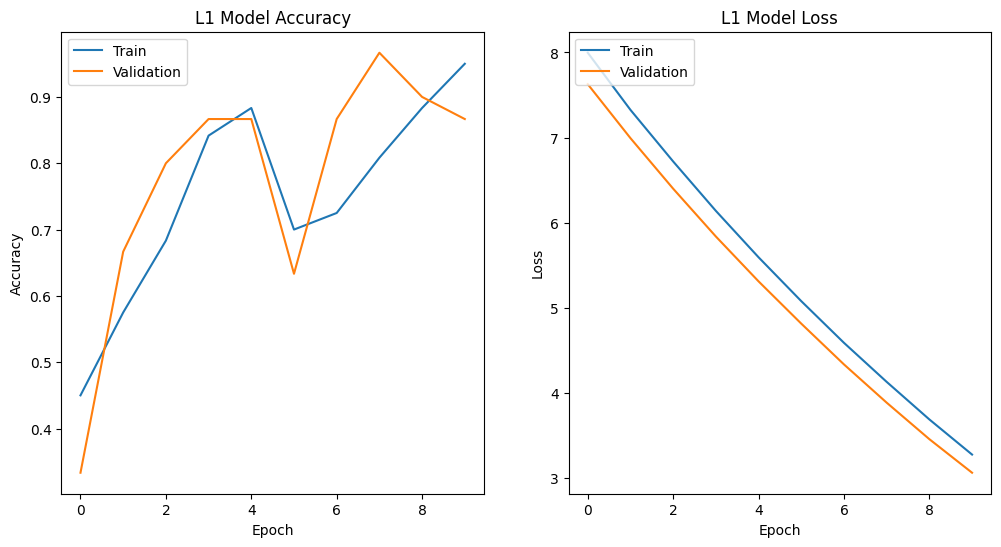

In [20]:
plot_curves(history, "L1")

In [21]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(4,),kernel_regularizer=regularizers.l2(l2=0.01)),
    Dense(32, activation='relu',kernel_regularizer=regularizers.l2(l2=0.01)),
    Dense(64, activation='relu',kernel_regularizer=regularizers.l2(l2=0.01)),
    Dense(32, activation='relu',kernel_regularizer=regularizers.l2(l2=0.01)),
    Dense(16, activation='relu',kernel_regularizer=regularizers.l2(l2=0.01)),
    Dense(3, activation='softmax')
])

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/10
15/15 [==============================] - 3s 40ms/step - loss: 2.2793 - accuracy: 0.4833 - val_loss: 2.0650 - val_accuracy: 0.7000
Epoch 2/10
15/15 [==============================] - 0s 10ms/step - loss: 1.9331 - accuracy: 0.6583 - val_loss: 1.7686 - val_accuracy: 0.7000
Epoch 3/10
15/15 [==============================] - 0s 11ms/step - loss: 1.6678 - accuracy: 0.6667 - val_loss: 1.5477 - val_accuracy: 0.7000
Epoch 4/10
15/15 [==============================] - 0s 11ms/step - loss: 1.4728 - accuracy: 0.7583 - val_loss: 1.3852 - val_accuracy: 0.8667
Epoch 5/10
15/15 [==============================] - 0s 10ms/step - loss: 1.3086 - accuracy: 0.8917 - val_loss: 1.2281 - val_accuracy: 0.8333
Epoch 6/10
15/15 [==============================] - 0s 11ms/step - loss: 1.1570 - accuracy: 0.9167 - val_loss: 1.0980 - val_accuracy: 0.9667
Epoch 7/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0269 - accuracy: 0.9583 - val_loss: 1.0162 - val_accuracy: 0.8667
Epoch 8/10
15

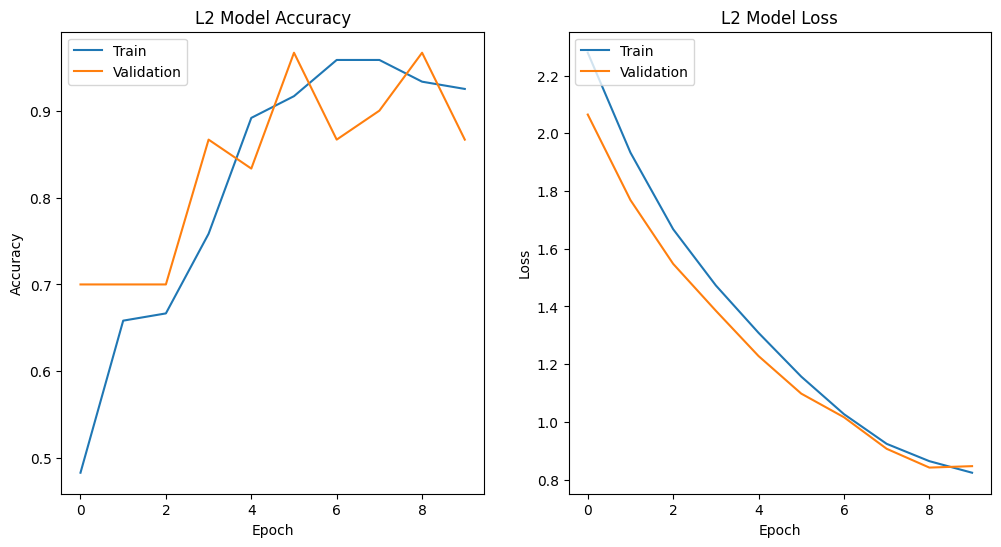

In [23]:
plot_curves(history, "L2")

# Weight Tying

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder class
class Autoencoder(tf.keras.Model):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoding_dim = encoding_dim
        self.encoder = tf.keras.layers.Dense(encoding_dim, activation='relu')
        self.decoder = tf.keras.layers.Dense(input_dim, activation='sigmoid')
        # Initialize decoder weights tied to encoder weights
        self.decoder.set_weights(self._initialize_decoder_weights())

    def _initialize_decoder_weights(self):
        # Get encoder weights
        encoder_weights = self.encoder.get_weights()
        # Transpose encoder weights for decoder
        decoder_weights = [tf.transpose(w) for w in encoder_weights]
        return decoder_weights

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

# Define autoencoder parameters
input_dim = 784  # Size of MNIST images
encoding_dim = 64  # Size of encoded representations

# Create an instance of the autoencoder model
autoencoder = Autoencoder(input_dim, encoding_dim)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder model
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 7s 20ms/step - loss: 0.2432 - val_loss: 0.1631
Epoch 2/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1442 - val_loss: 0.1271
Epoch 3/10
235/235 [==============================] - 7s 31ms/step - loss: 0.1186 - val_loss: 0.1087
Epoch 4/10
235/235 [==============================] - 5s 22ms/step - loss: 0.1041 - val_loss: 0.0977
Epoch 5/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0950 - val_loss: 0.0904
Epoch 6/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0887 - val_loss: 0.0852
Epoch 7/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0842 - val_loss: 0.0816
Epoch 8/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0812 - val_loss: 0.0792
Epoch 9/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0791 - val_loss: 0.0774
Epoch 10/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0776 - val_lo

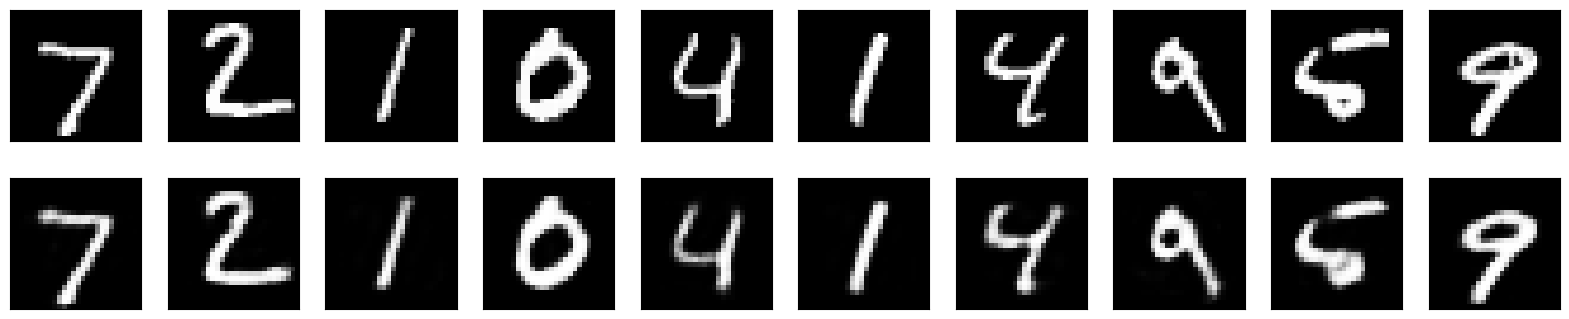

In [2]:
# Encode and decode some digits
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

# Plot the reconstructed images
import matplotlib.pyplot as plt

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


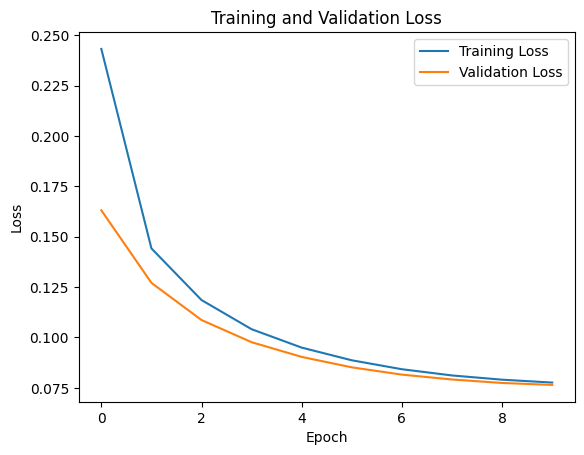

In [3]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()